In [1]:
pip install kagglehub

# Download the Blood Cells Image Dataset from Kaggle

In [2]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("unclesamulus/blood-cells-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 268M/268M [00:01<00:00, 164MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2


## List all directories (classes) in the dataset

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2/bloodcells_dataset'

# List all directories (classes) in the dataset
classes = os.listdir(dataset_path)
print("Classes in the dataset:", classes)



Classes in the dataset: ['ig', 'eosinophil', 'basophil', 'lymphocyte', 'neutrophil', 'platelet', 'erythroblast', 'monocyte']


# Count the number of images in each class

In [4]:
# Count the number of images in each class
class_counts = {}
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    class_counts[class_name] = len(os.listdir(class_dir))

print("Number of images per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Number of images per class:
ig: 2895 images
eosinophil: 3117 images
basophil: 1218 images
lymphocyte: 1214 images
neutrophil: 3329 images
platelet: 2348 images
erythroblast: 1551 images
monocyte: 1420 images


# Visualize sample images from each class

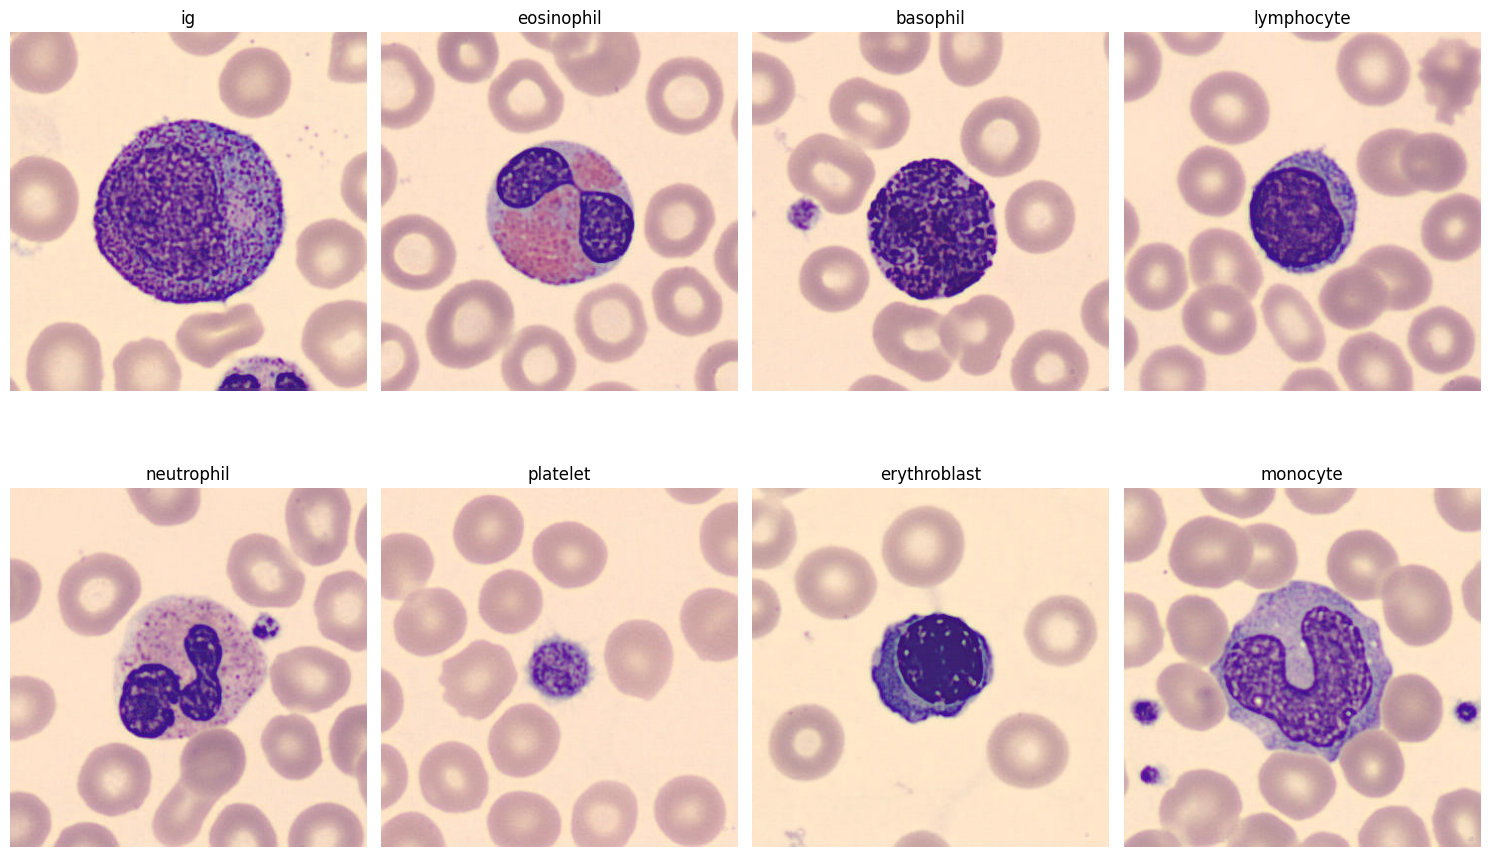

In [5]:
# Visualize sample images from each class
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)
    sample_image = os.listdir(class_dir)[0]  # Take the first image
    image_path = os.path.join(class_dir, sample_image)

    # Load and display the image
    image = Image.open(image_path)
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
import os

In [7]:
import numpy as np

# Function to inspect image properties

In [8]:
# Function to inspect image properties
def inspect_image(image_path):
    image = Image.open(image_path)
    print("Image size:", image.size)  # (width, height)
    print("Image mode:", image.mode)  # RGB, grayscale, etc.

    # Convert image to numpy array
    image_array = np.array(image)
    print("Image shape:", image_array.shape)  # (height, width, channels)
    print("Min pixel value:", image_array.min())
    print("Max pixel value:", image_array.max())

    # Plot RGB channels
    plt.figure(figsize=(15, 5))
    for i, channel in enumerate(["Red", "Green", "Blue"]):
        plt.subplot(1, 3, i + 1)
        plt.imshow(image_array[:, :, i], cmap="gray")
        plt.title(f"{channel} Channel")
        plt.axis("off")
    plt.show()

# Inspect a sample image from each class


Inspecting image from class: ig
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 0
Max pixel value: 255


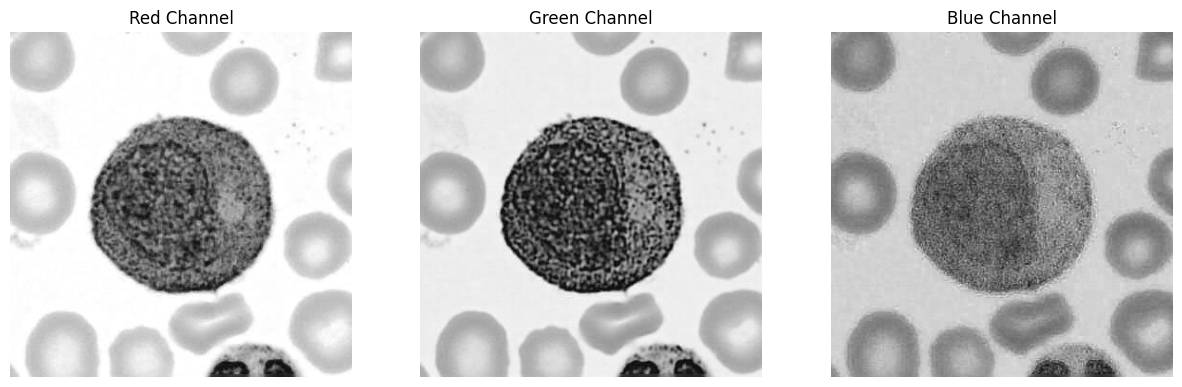


Inspecting image from class: eosinophil
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 0
Max pixel value: 255


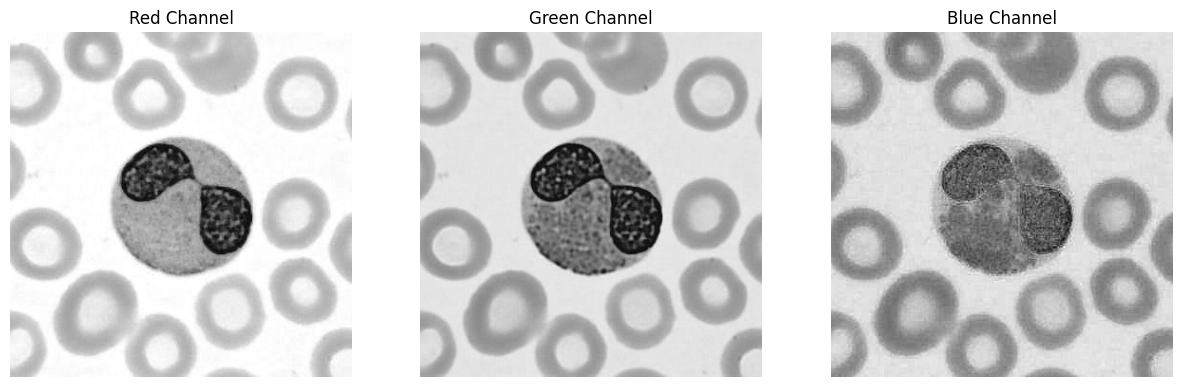


Inspecting image from class: basophil
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 0
Max pixel value: 255


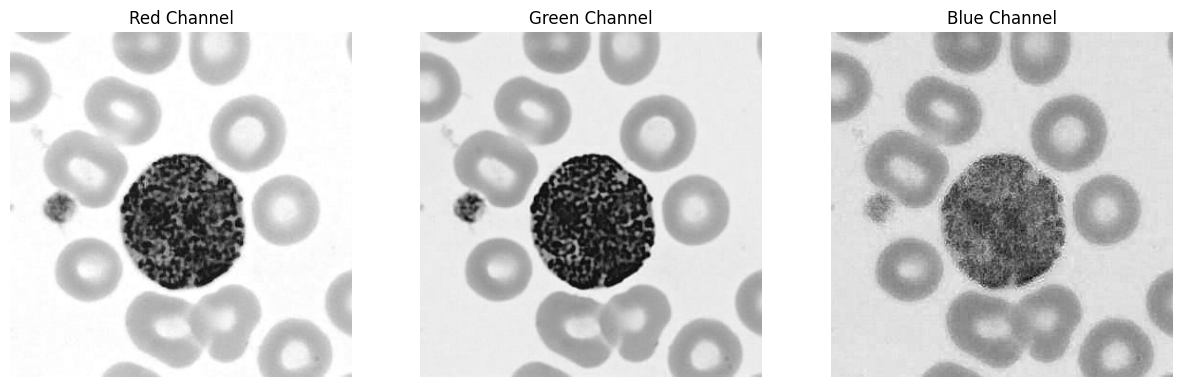


Inspecting image from class: lymphocyte
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 2
Max pixel value: 255


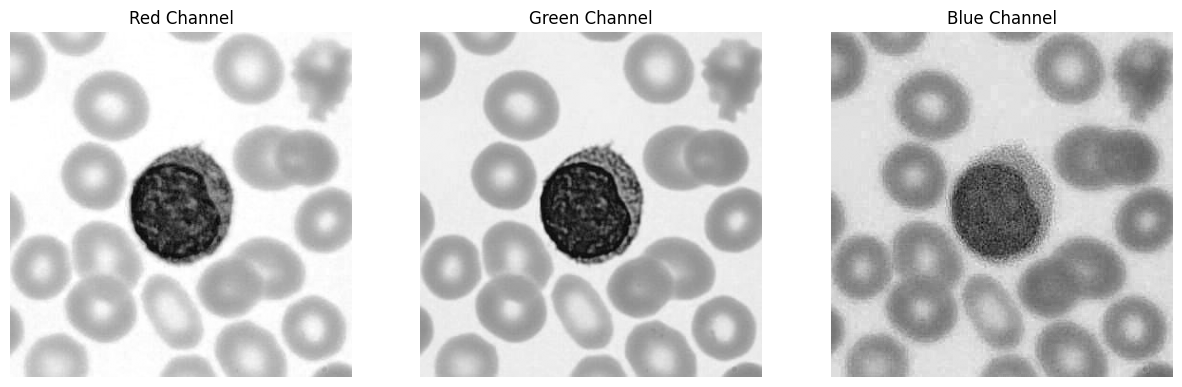


Inspecting image from class: neutrophil
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 1
Max pixel value: 255


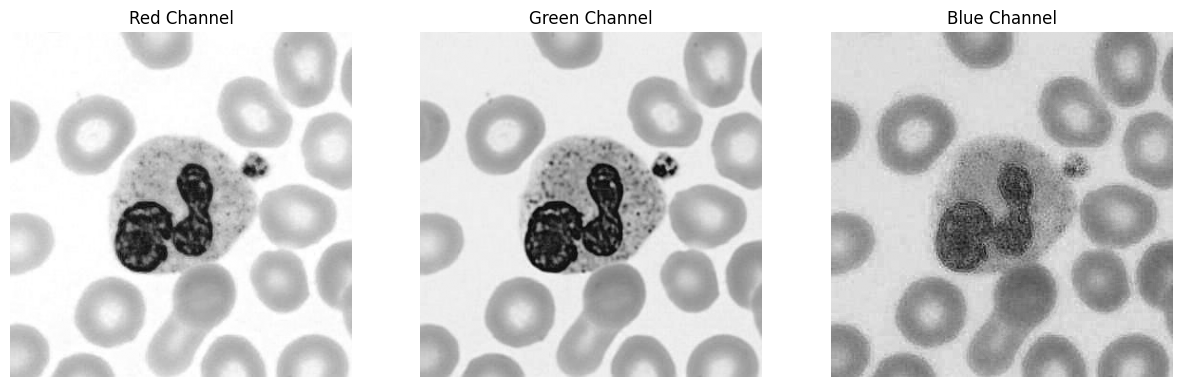


Inspecting image from class: platelet
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 10
Max pixel value: 255


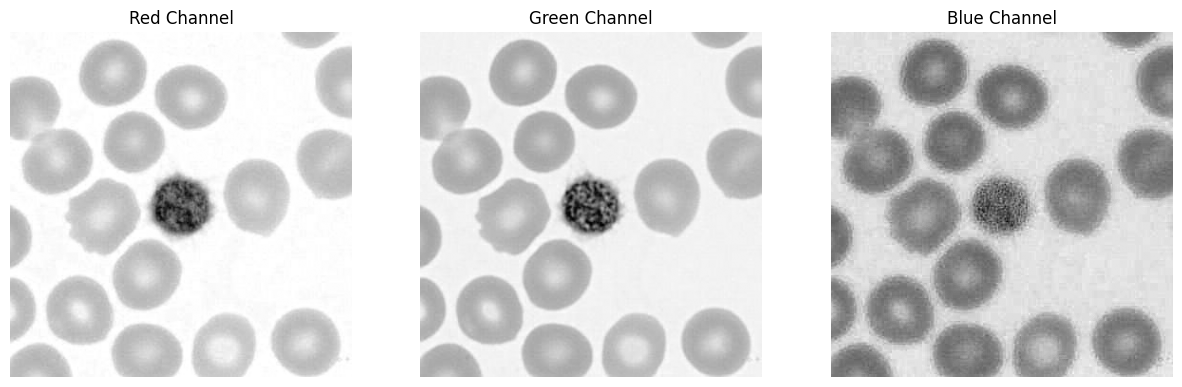


Inspecting image from class: erythroblast
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 1
Max pixel value: 255


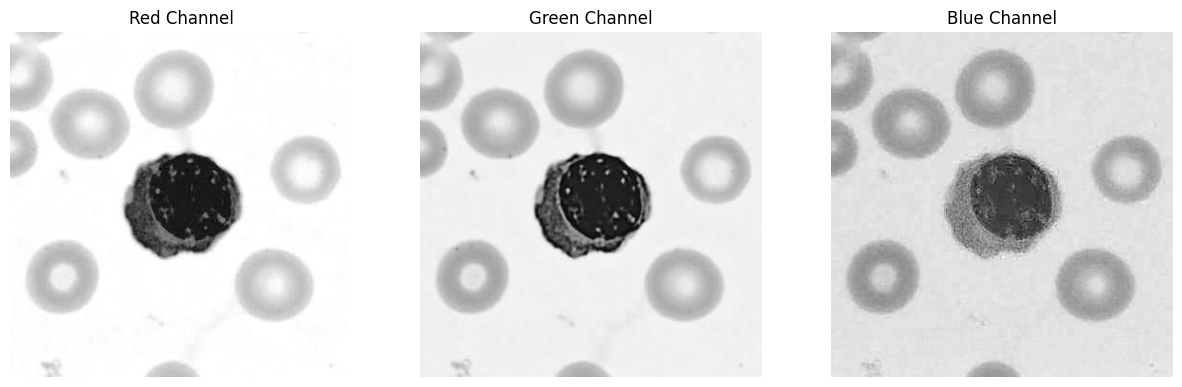


Inspecting image from class: monocyte
Image size: (360, 363)
Image mode: RGB
Image shape: (363, 360, 3)
Min pixel value: 3
Max pixel value: 255


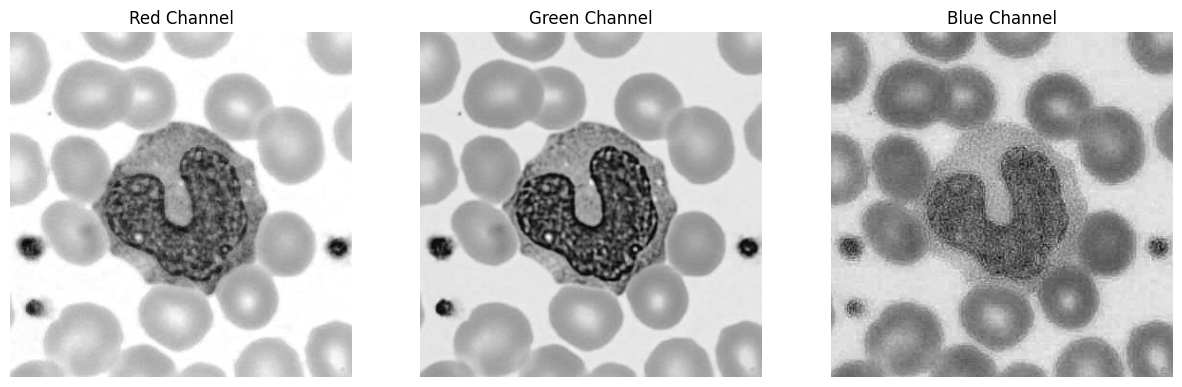

In [9]:
# Inspect a sample image from each class
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    sample_image = os.listdir(class_dir)[0]  # Take the first image
    image_path = os.path.join(class_dir, sample_image)

    print(f"\nInspecting image from class: {class_name}")
    inspect_image(image_path)


# Preprocessing transformations

In [10]:
from torchvision import transforms

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),     # Random rotation up to 10 degrees
    transforms.ColorJitter(brightness=0.2),  # Random brightness adjustment
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Print the transformation pipeline
print("Preprocessing Transformations:")
print(transform)

Preprocessing Transformations:
Compose(
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=None, saturation=None, hue=None)
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


In [17]:
!ls /root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2/bloodcells_dataset/erythroblast

ERB_101031.jpg	ERB_246454.jpg	 ERB_405525.jpg  ERB_552922.jpg  ERB_703985.jpg  ERB_857270.jpg
ERB_101277.jpg	ERB_246744.jpg	 ERB_405756.jpg  ERB_553525.jpg  ERB_704346.jpg  ERB_857402.jpg
ERB_10157.jpg	ERB_247744.jpg	 ERB_405806.jpg  ERB_554438.jpg  ERB_704552.jpg  ERB_861249.jpg
ERB_101704.jpg	ERB_247876.jpg	 ERB_406182.jpg  ERB_554489.jpg  ERB_704706.jpg  ERB_861303.jpg
ERB_101733.jpg	ERB_248076.jpg	 ERB_406256.jpg  ERB_55484.jpg	 ERB_705311.jpg  ERB_861446.jpg
ERB_102372.jpg	ERB_248448.jpg	 ERB_40659.jpg	 ERB_555027.jpg  ERB_705706.jpg  ERB_863561.jpg
ERB_102733.jpg	ERB_2489268.jpg  ERB_406874.jpg  ERB_555129.jpg  ERB_705765.jpg  ERB_863844.jpg
ERB_103778.jpg	ERB_248999.jpg	 ERB_406917.jpg  ERB_557693.jpg  ERB_706935.jpg  ERB_864437.jpg
ERB_104326.jpg	ERB_249022.jpg	 ERB_406954.jpg  ERB_560016.jpg  ERB_706973.jpg  ERB_864505.jpg
ERB_104607.jpg	ERB_249169.jpg	 ERB_407502.jpg  ERB_560030.jpg  ERB_707354.jpg  ERB_864908.jpg
ERB_106275.jpg	ERB_250013.jpg	 ERB_407648.jpg  ERB_560252.jpg 

#Data Augmentation

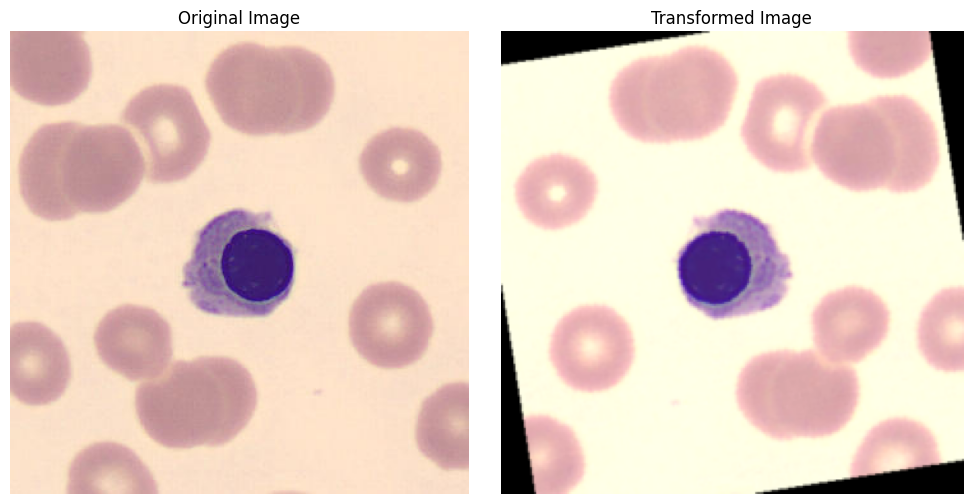

In [11]:
import matplotlib.pyplot as plt

# Load a sample image
sample_image_path = "/root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2/bloodcells_dataset/erythroblast/ERB_101031.jpg"
sample_image = Image.open(sample_image_path)

# Apply transformations
transformed_image = transform(sample_image)

# Convert tensor back to numpy for visualization
transformed_image = transformed_image.permute(1, 2, 0).numpy()  # Change from (C, H, W) to (H, W, C)
transformed_image = (transformed_image * 0.5) + 0.5  # Undo normalization for visualization

# Plot original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Initializaing the model

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load a pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Replace the final fully connected layer
num_classes = 8  # Number of classes in the dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the appropriate device (GPU or CPU)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print the model architecture
print(model)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
class BloodCellsDataset(Dataset):
    def __init__(self, dataset_path, transform=None):
        self.dataset_path = dataset_path
        self.transform = transform
        self.classes = os.listdir(dataset_path)  # List of class names
        self.image_paths = []
        self.labels = []

        # Collect all image paths and labels
        for class_name in self.classes:
            class_dir = os.path.join(dataset_path, class_name)
            for image_name in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, image_name))
                self.labels.append(self.classes.index(class_name))  # Convert class name to numeric label

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load image
        image = Image.open(image_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label  # Return image and its numeric label

#Data Split: 70% for training, 15% for validation, 15% for testing.

In [14]:
from torch.utils.data import DataLoader, random_split

# Create the dataset
dataset = BloodCellsDataset(dataset_path, transform=transform)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(dataset))  # 70% for training
val_size = int(0.15 * len(dataset))   # 15% for validation
test_size = len(dataset) - train_size - val_size  # 15% for testing

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print the sizes of the datasets
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Training samples: 11964
Validation samples: 2563
Test samples: 2565


# Training function

In [15]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            # Move data to the appropriate device
            images = images.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Print training statistics
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                # Move data to the appropriate device
                images = images.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(images)
                loss = criterion(outputs, labels)

                # Update statistics
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Print validation statistics
        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct / total
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")



# Train the model

In [17]:

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

Epoch 1/5
Train Loss: 0.2683, Train Acc: 90.78%
Val Loss: 0.7181, Val Acc: 78.85%
Epoch 2/5
Train Loss: 0.1374, Train Acc: 95.42%
Val Loss: 0.2237, Val Acc: 92.35%
Epoch 3/5
Train Loss: 0.1120, Train Acc: 96.20%
Val Loss: 0.1914, Val Acc: 93.95%
Epoch 4/5
Train Loss: 0.0921, Train Acc: 96.93%
Val Loss: 0.1748, Val Acc: 93.72%
Epoch 5/5
Train Loss: 0.0762, Train Acc: 97.63%
Val Loss: 0.2565, Val Acc: 92.70%


In [18]:
# prompt: save the model to local

# Save the trained model
torch.save(model.state_dict(), '/content/blood_cells_classifier.pth')
print("Model saved to /content/blood_cells_classifier.pth")


Model saved to /content/blood_cells_classifier.pth


In [19]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#Evaluation

In [20]:
# Make predictions on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

In [24]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9224
Precision: 0.9370
Recall: 0.9224
F1 Score: 0.9233


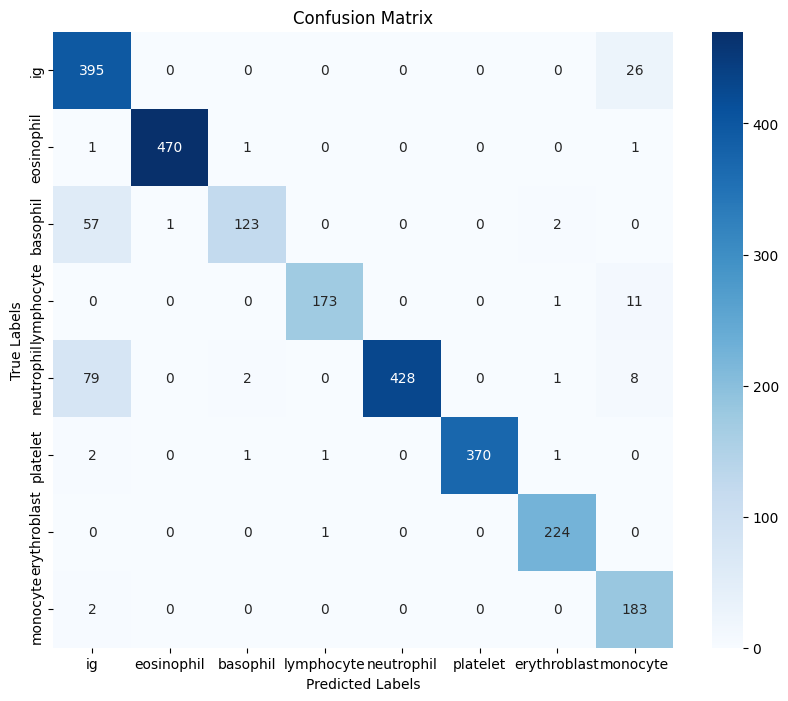

In [25]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [26]:
!pip install streamlit==1.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: packaging
    Found existing instal

#Inference

In [29]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [31]:
import gradio as gr
import torch
from PIL import Image
from torchvision import transforms


def classify_image(image):
    # Preprocess the image
    image = transform(image).unsqueeze(0).to(device)

    # Make prediction
    with torch.no_grad():
        output = model(image)
        predicted_class_index = torch.argmax(output).item()
        predicted_class = classes[predicted_class_index]

    # Return the prediction
    return predicted_class

# Create the Gradio interface
# Changed gr.inputs.Image to gr.Image
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Blood Cell Image Classifier",
    description="Upload an image to classify blood cells."
)

# Launch the interface
iface.launch(inline=True) # Set inline=True to display within the notebook

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d05a239ac1e00022a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
